<ins> Contexte</ins> : L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

### Introduction : Import des bibliothèques nécessaires au projet
 Import des bibliothèques importantes pour notre travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
np.set_printoptions(precision=2,linewidth=500,suppress=True)

### 1)  Extration des données 


On commence par créer une fonction qui télécharge et extrait une archive zip

In [2]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

def download_unzip(zipurl, destination):
    """Download zipfile from URL and extract it to destination"""
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall(destination)

On l'utilise pour télécharger l'archive des données Open Food

In [3]:
download_unzip("https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip", "food")

On affiche le contenu de l'archive

On charge le fichier csv comme un dataframe

In [4]:
food_data = pd.read_csv("food/fr.openfoodfacts.org.products.csv",sep='\t')  


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
food_data[(food_data['pnns_groups_1'].notna())  & (food_data['pnns_groups_1']!='unknown')][['code','product_name','created_datetime','pnns_groups_1','ingredients_text','sugars_100g']]

,code,product_name,created_datetime,pnns_groups_1,ingredients_text,sugars_100g
174,290616,Salade Cesar,2017-01-16T22:32:58Z,Fruits and vegetables,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,0.0
175,394710,Danoises à la cannelle roulées,2017-01-15T16:22:50Z,Sugary snacks,"Ingrédients: Pâte (farine, eau, beurre, sucre,...",28.1
177,1071894,Flute,2014-08-30T15:07:32Z,Cereals and potatoes,Wheat,NaN
180,1938067,Chaussons tressés aux pommes,2017-01-15T17:32:08Z,Sugary snacks,"Ingrédients : Pâte (farine, margarines d'huile...",24.7
182,5200016,lentilles vertes,2015-09-02T09:37:37Z,Cereals and potatoes,lentilles vertes,NaN
...,...,...,...,...,...,...
320759,9901198001583,Лимон — лайм,2015-12-20T06:48:53Z,Fruits and vegetables,NaN,NaN
320763,99111250,Thé vert Earl grey,2013-04-28T15:30:39Z,Beverages,"thé vert, arôme naturel bergamote avec autres ...",0.5
320765,9935010000003,Rillette d'oie,2015-10-31T12:07:09Z,Fish Meat Eggs,"viande d'oie, graisse de canard, épices, sel, ...",NaN
320766,99410148,NaN,2016-05-22T17:02:52Z,Salty snacks,NaN,NaN


In [6]:
food_data.shape

(320772, 162)

In [7]:
print(food_data.columns.to_list() )

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

- On regarde le nombre de variables et le type de chaque variables 

### 2) Choix des variables et définition du périmètre de l'analyse statistique

- Les variables choisies par rapport à l'application 

On regroupe les varaibles en deux groupes distinctes:

In [8]:
var_numeriques=["proteins_100g",
"carbohydrates_100g","sugars_100g","lactose_100g","fat_100g", 
"saturated-fat_100g","fiber_100g","magnesium_100g","fruits-vegetables-nuts_100g"]

var_categorielles =["code","product_name","brands", "ingredients_text","pnns_groups_1","pnns_groups_2","nutrition_grade_fr","last_modified_datetime",	"origins",	"countries",	"main_category"]

In [9]:
variables1 =  var_categorielles + var_numeriques

- Je ne garde que les variables choisies dans mon dataframe 

In [10]:
food_data= food_data[variables1]
food_data.head()

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,2016-09-17T09:18:13Z,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,d,2017-03-09T14:32:37Z,NaN,US,NaN,3.57,64.29,14.29,NaN,28.57,28.57,3.6,NaN,NaN
2,4559,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,b,2017-03-09T14:32:37Z,NaN,US,NaN,17.86,60.71,17.86,NaN,17.86,0.00,7.1,NaN,NaN
3,16087,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,d,2017-03-09T10:35:31Z,NaN,US,NaN,17.86,17.86,3.57,NaN,57.14,5.36,7.1,NaN,NaN
4,16094,Organic Polenta,Bob's Red Mill,Organic polenta,NaN,NaN,NaN,2017-03-09T10:34:13Z,NaN,US,NaN,8.57,77.14,NaN,NaN,1.43,NaN,5.7,NaN,NaN


Je converti le format de la varaible last_modified_datetime en datetime

Mais avant de convertir, je dois vérifier si il n'y pas de valeurs abberantes dans cette colonne. Y-a-til des dates qui ne sont pas constituées de chiffres ? Y-a-til des dates qui commencent par  0 ? etc.

In [11]:
food_data[~food_data.last_modified_datetime.str.startswith(('2', '1'))]['last_modified_datetime'].value_counts()

en:france                              20
en:belgium,en:france                    1
en:belgium,en:france,en:switzerland     1
en:france,en:switzerland                1
Name: last_modified_datetime, dtype: int64

On voit dans la colonne last_modified_date_time , il y a 20 lignes qui ont pour date en:france , 2 lignes qui pour date en:belgium, 1 ligne qui a pour date en:france, et une ligne qui a pour date 'en:france,en:switzerland' . Nous allons voir de plus près les produits qui sont associés à ces "fausses" dates.

In [12]:
food_data[~food_data.last_modified_datetime.str.startswith(('2', '1'))][['code','product_name']]

,code,product_name
189068,NaN,"Belgique,France"
189103,NaN,France
189109,NaN,"Belgique,France,Suisse"
189119,NaN,France
189152,NaN,France
189160,NaN,France
189162,NaN,France
189168,NaN,France
189242,NaN,France
189244,NaN,France


Aucun produit n'est assoccié à ces dates erronnées. Nous allons donc supprimer toutes les lignes qui contiennent ces date là.

In [13]:
food_data=food_data[food_data.last_modified_datetime.str.startswith(('2', '1'))]

Les dates de la colonne last_modified_datetime sont au format aaaa-mm-jjTmin:sec. Nous allons les mettre au format aaaa-mm-jj.

In [14]:
#Pour chaque date on ne garde que l'année, le mois et le jour, puis on convertit en format datetime
food_data['last_modified_datetime'] = food_data['last_modified_datetime'].str[:10]
food_data['last_modified_datetime'] = pd.to_datetime(food_data['last_modified_datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320749 entries, 0 to 320771
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   code                         320749 non-null  object        
 1   product_name                 302987 non-null  object        
 2   brands                       292360 non-null  object        
 3   ingredients_text             248939 non-null  object        
 4   pnns_groups_1                91513 non-null   object        
 5   pnns_groups_2                94491 non-null   object        
 6   nutrition_grade_fr           221210 non-null  object        
 7   last_modified_datetime       320749 non-null  datetime64[ns]
 8   origins                      22168 non-null   object        
 9   countries                    320469 non-null  object        
 10  main_category                84366 non-null   object        
 11  proteins_100g             

Voyons si il y a dates avant 2012

In [16]:
food_data[food_data['last_modified_datetime']< '2012-01-01']

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g


In [17]:
print(food_data.shape[0], " lignes dans le dataframe")

320749  lignes dans le dataframe


Je restreint l'étude aux produits qui sont vendus en France.

In [18]:
food_data=food_data[food_data["countries"]=="France"]
food_data.shape[0]

77292

In [19]:
food_data["origins"].value_counts()/food_data["origins"].value_counts().sum()*100

France                  33.924016
Union Européenne         2.820106
Italie                   2.751155
Espagne                  2.571882
Union européenne         1.254913
                          ...    
Ocean Indien             0.006895
UE / NON UE              0.006895
Canard,France            0.006895
Porc,Bretagne,France     0.006895
Flaxieu,Bugey,Ain        0.006895
Name: origins, Length: 3215, dtype: float64

On voit que environ 34% des produits conservés sont originaires de France.



Suppression des produits non-alimentaires

In [20]:
food_data=food_data[food_data['main_category']!='en:non-food-products']

In [21]:
food_data.isna().sum().sort_values()

code                               0
last_modified_datetime             0
countries                          0
product_name                    1239
brands                          1652
pnns_groups_2                  13848
pnns_groups_1                  15841
proteins_100g                  16039
sugars_100g                    17729
saturated-fat_100g             17826
nutrition_grade_fr             18710
main_category                  18712
ingredients_text               26746
fat_100g                       32631
carbohydrates_100g             33043
fiber_100g                     33539
origins                        62627
fruits-vegetables-nuts_100g    74243
magnesium_100g                 76433
lactose_100g                   77011
dtype: int64

### 3)  Suppression de quelques données manquantes et des doublons

- Taux de remplissage des variables 

In [22]:
pd.DataFrame(food_data.notna().sum()/len(food_data)*100)

,0
code,100.000000
product_name,98.393621
brands,97.858162
ingredients_text,65.323480
pnns_groups_1,79.461947
pnns_groups_2,82.045897
nutrition_grade_fr,75.742253
last_modified_datetime,100.000000
origins,18.803319
countries,100.000000


Tous les produits ont un code-barre.
24.2% des produits n'ont pas de nutriscore. On peut considerer cela comme raisonnable vu que la plupart des produits sur le marché ne detiennent pas de nutriscore. Nous décidons alors de ne pas faire une imputation pour les nutriscore manquant. Nous mettrons "inconnue" à la place des nutiscore manquants.

les variables  magnesium_100g, lactose_100g, fruits-vegetables-nuts_100g contiennet plus 98% de données manquantes. 

Est-ce qu'il y a des codes barres négatifs ? ou contenant que des 00 ? 

In [23]:
food_data[food_data.code.str.contains('-', na=False)]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g


In [24]:
len(food_data)

77130

Suppression des lignes qui ont partout des NaN

In [25]:
food_data=food_data.dropna(axis=0, how='all')  #Suppression des lignes dont toutes les valeurs sont de NaN

Suppression des lignes qui ont des NaN pour les variables se terminanat par '_100g'

In [26]:
food_data.dropna(subset=var_numeriques, how='all', inplace =True)

Est-ce que tous les produits ont un nom ? 

In [27]:
food_data["product_name"].isna().sum()
print(food_data["product_name"].isna().sum(), " n'ont pas de nom")

318  n'ont pas de nom


Parmi ces 318 est-ce tous ont une marque et une catégorie ?

In [28]:
food_data[food_data["product_name"].isna() & food_data["brands"].isna() & food_data["pnns_groups_1"].isna() & food_data["pnns_groups_2"].isna()]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g


In [29]:
food_data[(food_data["product_name"].isna()) & (food_data["brands"].isna()) & (food_data["pnns_groups_1"]=="unknown") & (food_data["pnns_groups_2"]=="unknown") ]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
789,83164,NaN,NaN,NaN,unknown,unknown,a,2016-01-14,NaN,France,NaN,9.3,16.2,0.5,NaN,3.8,1.4,1.5,NaN,NaN
29571,34780178000,NaN,NaN,NaN,unknown,unknown,c,2015-09-08,NaN,France,NaN,3.1,3.9,3.9,NaN,10.0,7.0,NaN,NaN,NaN
62684,517805,NaN,NaN,NaN,unknown,unknown,d,2016-02-18,NaN,France,NaN,6.4,54.1,42.9,NaN,24.1,2.9,4.7,NaN,NaN
79931,72252227849,NaN,NaN,NaN,unknown,unknown,NaN,2015-12-06,NaN,France,NaN,0.8,65.0,NaN,NaN,0.1,NaN,NaN,NaN,NaN
176217,2000000033230,NaN,NaN,NaN,unknown,unknown,e,2016-07-06,NaN,France,NaN,7.2,63.0,32.0,NaN,22.0,11.0,3.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307858,8411858211067,NaN,NaN,NaN,unknown,unknown,d,2017-04-03,NaN,France,NaN,11.0,52.0,49.7,NaN,28.0,2.0,2.5,NaN,NaN
308230,8413800085566,NaN,NaN,NaN,unknown,unknown,c,2016-04-13,NaN,France,NaN,0.2,0.7,0.1,NaN,0.4,0.1,0.1,NaN,NaN
310660,8437009764794,NaN,NaN,NaN,unknown,unknown,a,2016-09-23,NaN,France,NaN,8.9,42.4,4.1,NaN,5.7,1.1,11.8,NaN,NaN
311377,8480013025306,NaN,NaN,NaN,unknown,unknown,b,2016-08-14,NaN,France,NaN,1.2,8.9,3.2,NaN,3.1,0.7,1.9,NaN,NaN


503 produits n'ont ni de nom, ni de marque, ni de catégries. On les supprime.

In [30]:
food_data=food_data[food_data["product_name"].notna() & food_data["brands"].notna() & food_data["pnns_groups_1"].notna() & food_data["pnns_groups_2"].notna()]

Y a t-il des produits qui n'ont pas de nutriscore ? 

In [31]:
print(len(food_data[food_data["nutrition_grade_fr"].isna()]) , "n'ont pas de  nutriscore")

3507 n'ont pas de  nutriscore


In [32]:
f=food_data[food_data["nutrition_grade_fr"].isna()] [['product_name', 'last_modified_datetime', 'origins','brands']]

Nombre de produits français qui n'ont pas de nutriscore en fonction de la date d'enregistrement dans le site openfoodfacts.

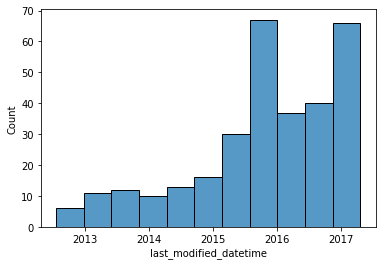

In [33]:
sns.histplot(x='last_modified_datetime', data=f[f['origins']=='France'])

Y at-il des produits qui n'ont ni nutriscore, ni nom, ni marque, ni catégorie ? 

In [34]:
a=food_data[food_data["nutrition_grade_fr"].isna() & food_data["product_name"].isna()]

In [35]:
a=food_data[food_data["nutrition_grade_fr"].isna() & food_data["product_name"].isna() & food_data["brands"].isna()]
print(len(a), ' produit nont ni nomn, ni nutriscore, ni catégorie')

0  produit nont ni nomn, ni nutriscore, ni catégorie


In [36]:
food_data[food_data["nutrition_grade_fr"].isna() & food_data["pnns_groups_1"].isna()]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g


In [37]:
food_data[food_data["nutrition_grade_fr"].isna() & food_data["pnns_groups_2"].isna()]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g


In [38]:
a=food_data[food_data["nutrition_grade_fr"].isna() & (food_data["pnns_groups_1"]=="unknown") ]
print(len(a), ' produit nont ni nutriscore, ni pnns_groups_1')

580  produit nont ni nutriscore, ni pnns_groups_1


In [39]:
food_data[food_data["nutrition_grade_fr"].isna() & (food_data["pnns_groups_2"]=="unknown") ]
print(len(a), ' produit nont ni nutriscore, ni pnns_groups_2')

580  produit nont ni nutriscore, ni pnns_groups_2


In [40]:
food_data["nutrition_grade_fr"] = food_data["nutrition_grade_fr"].fillna("inconnue")

Tous les produits qui n'ont pas de nutriscore ont un nom et une marque. Mais 3781 d'entre eux n'appartiennent à auncune catégorie connue. Ceci n'est pas un problème car notre application n'exige pas une présence obligatoire du nutriscore dans les données du produit. 

Quelles sont les différentes catégories de produits ? 

- Catégorie pnns_groups_1

In [41]:
food_data["pnns_groups_1"].replace("unknown","inconnue", inplace=True)
food_data["pnns_groups_2"].replace("unknown","inconnue", inplace =True)

In [42]:
display(food_data["pnns_groups_1"].value_counts())
print("Il y a : ", len(set(food_data["pnns_groups_1"])),  " catégories")

Sugary snacks              7114
inconnue                   7092
Milk and dairy products    5443
Composite foods            5227
Cereals and potatoes       5020
Fish Meat Eggs             4912
Beverages                  4445
Fat and sauces             2890
Fruits and vegetables      2870
Salty snacks               1758
fruits-and-vegetables       443
sugary-snacks               363
cereals-and-potatoes          1
Name: pnns_groups_1, dtype: int64

Il y a :  13  catégories


Parmi ces 13  catégories il y a en deux qui ont la même orthographe à quelques détails près. Ce sont les catégories  "Cereals and potatoes" et  "cereals-and-potatoes ". Voyons si les deux désignent la même catégorie.

In [43]:
display(food_data[food_data["pnns_groups_1"]=="Cereals and potatoes"])
display(food_data[food_data["pnns_groups_1"]=="cereals-and-potatoes"])

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
25086,30000065075,Peanut Butter Crunch,Cap'n Crunch's,NaN,Cereals and potatoes,Breakfast cereals,d,2016-12-17,NaN,France,en:breakfasts,7.41,77.8,33.3,NaN,9.26,3.7,3.7,NaN,NaN
29109,34000312177,Syrup Chocolate Flavor,Hershey's,"Sirop de maïs à haute teneur en fructose, siro...",Cereals and potatoes,Cereals,d,2017-01-18,NaN,France,en:plant-based-foods-and-beverages,1.70,60.7,50.1,NaN,0.90,0.6,NaN,NaN,NaN
29113,34000400126,Beurre De Cacahuètes Crémeux,Reese s,"arachides grillées, sucre, huile végétale hydr...",Cereals and potatoes,Legumes,e,2017-03-04,NaN,France,en:spreads,25.00,21.0,9.0,NaN,50.00,8.0,0.0,NaN,NaN
34626,37600106009,Beurre de cacahuètes crémeux,Skippy,"_Cacahuètes_ grillées (90 %), sucre, huile de ...",Cereals and potatoes,Legumes,d,2017-02-28,NaN,France,en:spreads,25.30,18.8,10.9,NaN,51.60,10.0,4.7,NaN,NaN
59306,48001270305,Skippy Smooth,"Skippy,Unilever","cacahuètes grillées 90%, sucre, huile de palme...",Cereals and potatoes,Legumes,d,2017-02-28,NaN,France,en:spreads,25.30,18.8,10.9,NaN,51.60,10.0,4.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320577,9556041130684,Vermicelles de riz thaï,Ayam,"farine de riz 90%, eau",Cereals and potatoes,Cereals,b,2016-09-03,NaN,France,en:plant-based-foods-and-beverages,6.90,80.0,0.0,NaN,0.40,0.2,NaN,NaN,NaN
320601,9556041610322,Nouilles instantanées,Ayam,"Farine de _blé_, huile de palme, sel, sels min...",Cereals and potatoes,Cereals,b,2017-03-28,NaN,France,en:plant-based-foods-and-beverages,5.10,30.0,1.1,NaN,8.10,4.0,1.8,NaN,NaN
320648,9556417639339,Mantou Sandwich,PA Food,"Farine de _blé_ (55.35%), eau (26.6%), sucre, ...",Cereals and potatoes,Bread,b,2017-03-31,NaN,France,en:breads,8.00,60.0,14.0,NaN,2.00,1.0,0.3,NaN,NaN
320652,9556587103869,Mini Paratha,Kawan,"Farine de _blé_ (52%), eau, huile de palme, su...",Cereals and potatoes,Bread,c,2017-02-06,NaN,France,en:breads,6.00,41.4,5.1,NaN,15.00,9.0,6.5,NaN,NaN


,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
218773,3270160046201,Maïs doux en épis,Picard,maïs,cereals-and-potatoes,cereals,a,2017-02-26,"France,Landes,Sud Ouest",France,en:frozen-foods,2.6,12.2,7.5,NaN,1.7,0.4,2.5,NaN,NaN


Ces deux catégories représentent en effet la même chose. Nous donc allons remplacer  "Cereals and potatoes" par "Cereals-and-potatoes"

In [44]:
food_data["pnns_groups_1"].replace("cereals-and-potatoes","Cereals and potatoes", inplace=True)

Catégorie la plus représentée parmi les pnns_groups_1

In [45]:
from wordcloud import WordCloud

def trace_word(df=food_data,column="pnns_groups_1",nb_top=25):
  fig = plt.figure(1, figsize=(15,11))
  ax1 = fig.add_subplot(1,1,1)

  words= df[column].value_counts().to_dict()  

  word_cloud = WordCloud(width=1000,height=520, normalize_plurals=False,background_color="black")
  word_cloud.generate_from_frequencies(words)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des top {}  {}\n".format(nb_top, column), fontsize=21)
  plt.show()


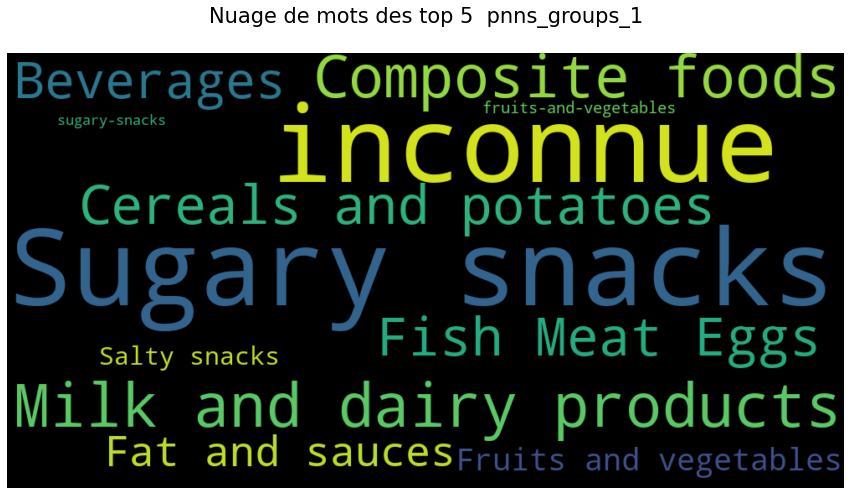

In [46]:
trace_word(df=food_data,column="pnns_groups_1",nb_top=5)

- Catégorie pnns_groups_2

In [47]:
display(food_data["pnns_groups_2"].value_counts().sort_values)
print("Il y a : ", len(set(food_data["pnns_groups_2"])),  " catégories")

<bound method Series.sort_values of inconnue                            7092
One-dish meals                      4240
Biscuits and cakes                  3105
Cereals                             2582
Cheese                              2532
Sweets                              2384
Processed meat                      2226
Dressings and sauces                1917
Milk and yogurt                     1768
Fish and seafood                    1673
Chocolate products                  1625
Appetizers                          1369
Sweetened beverages                 1347
Fruit juices                        1323
Non-sugared beverages               1317
Vegetables                          1231
Bread                               1051
Fats                                 973
Fruits                               971
Breakfast cereals                    905
Meat                                 904
Dairy desserts                       664
Sandwich                             596
Ice cream            

Il y a :  38  catégories


'Cereals' et 'cereals' présentent deux fois avec un différent orthographe.

In [48]:
food_data["pnns_groups_2"].replace("cereals","Cereals", inplace=True)

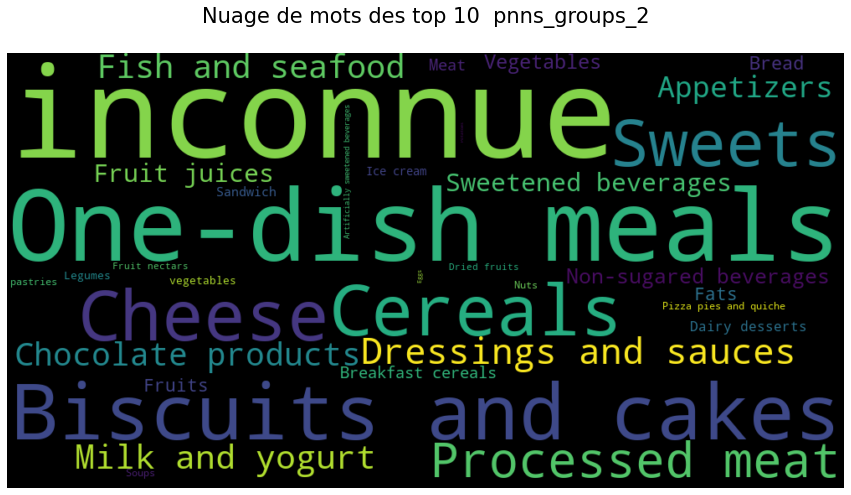

In [49]:
trace_word(df=food_data,column="pnns_groups_2",nb_top=10)

Un produit qui appratient à deux catégories ? 

In [50]:
food_data[(food_data['pnns_groups_1']!="inconnue") & (food_data['pnns_groups_2']!="inconnue") ]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
226,40608754,"Pepsi, Nouveau goût !",Pepsi,"Eau gazéifiée, sucre, colorant caramel E150d, ...",Beverages,Sweetened beverages,e,2015-08-09,NaN,France,en:sodas,0.000,10.40,10.40,NaN,0.0,0.00,0.000,NaN,NaN
240,87177756,7Up,"7Up,Pepsico","Eau gazéifiée, sucre, acidifiants (acide citri...",Beverages,Sweetened beverages,e,2015-06-06,NaN,France,en:fruit-sodas,0.000,10.40,10.40,NaN,0.0,0.00,NaN,NaN,NaN
242,10,Madeleines nature,Bijou,"Farine de _blé_, huile de colza, sucre, _oeufs...",Sugary snacks,Biscuits and cakes,d,2016-10-20,NaN,France,en:cakes,6.000,55.00,26.00,NaN,23.0,2.50,1.500,NaN,NaN
279,30,Cakes Raisins,Bijou,"Farine de _blé_, _œufs_ frais, huile de colza,...",Sugary snacks,Biscuits and cakes,d,2016-12-15,NaN,France,en:cakes,5.800,56.00,28.00,NaN,19.0,2.50,1.800,NaN,NaN
283,31,Cakes aux Fruits,Bijou,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",Sugary snacks,Biscuits and cakes,d,2016-08-18,NaN,France,en:pastries,4.900,60.00,34.00,NaN,15.0,2.00,1.500,NaN,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320668,9577283844672,100% Pur Jus 4 agrumes,Cora,"Jus d'orange (dont pulpe 1,6%), jus de clément...",Beverages,Fruit juices,c,2017-02-16,NaN,France,en:fruit-juices,0.600,10.20,9.20,NaN,0.5,0.00,0.600,NaN,100.0
320681,96068779,Spearmint sans sucres,Fisherman's Friend,"Édulcorants : sorbitol, sucralose, acésulfame-...",Sugary snacks,Sweets,c,2015-10-20,NaN,France,en:candies,0.040,95.87,0.12,NaN,1.3,1.28,0.005,NaN,NaN
320702,96118580,Fisherman's Friend Miel-Citron,Fisherman's Friend,"Édulcorants : sorbitols, sucralose, acésulfame...",Sugary snacks,Sweets,b,2016-12-24,NaN,France,en:candies,0.004,95.31,0.10,NaN,1.3,1.28,1.470,NaN,NaN
320751,9847548283004,Tartines craquantes bio au sarrasin,Le Pain des fleurs,NaN,Cereals and potatoes,Bread,a,2015-09-14,NaN,France,en:breads,13.000,74.80,2.60,NaN,2.8,0.60,5.900,0.186,NaN


Produisons une représentation graphique qui nous permet de voir si il existe des produits qui appartienent à deux catégories totalement opposées ou incompatibles. Cela nous aidera à détecter d'eventuelles incohérences dans le jeu de données.

In [51]:
import plotly.express as px
fig = px.histogram(food_data, x="pnns_groups_2", color="pnns_groups_1").update_xaxes(categoryorder='total descending')
fig.show()

La représenaton graphique ci-dessous nous montre qu'il n'y a pas de produits qui appartient à deux catégories incompatibles.

Y -a-t-il des produits qui n'ont ni nutriscore, ni de valeurs pour les variables se termiant par '_100g' ?

In [52]:
def var_100g (df) :
  L=[]
  for col in df.columns :
    if col.endswith('_100g') :
     L.append(col)
  return L


In [53]:
variable_100g=var_100g(food_data)
variable_100g

['proteins_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'lactose_100g',
 'fat_100g',
 'saturated-fat_100g',
 'fiber_100g',
 'magnesium_100g',
 'fruits-vegetables-nuts_100g']

Je supprime les produits qui n'ont ni nutriscore, ni de valeurs pour les variables se termiant par '_100g' 

11683 Produits dont les données concercant les variables se terimanant par _100g ne sont pas renseignées.

In [54]:
food_data=food_data[~food_data[variable_100g].isnull().all(axis=1)]

Y a-t-il des produits dont le nom contient des caractères spéciaux ? 

In [55]:
food_data[food_data['product_name'].str[:1].str.isalnum()==False]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
66946,607537,(Barcode Clash) Houmous with extra virgin oliv...,Marks & Spencer,Pois chiches cuits (42%) (Eau Pois chiches) Hu...,inconnue,inconnue,c,2017-04-13,NaN,France,en:salted-spreads,6.1,7.9,0.6,NaN,29.4,3.3,5.2,NaN,0.0
171529,888829601901,Ginger drink,gold kili,"Gingembre 60%, glucose, sucre de cane, miel et...",Beverages,Sweetened beverages,e,2017-04-15,9 woodlands link singapore 738723,France,en:beverages,0.0,99.0,91.0,NaN,0.0,0.0,0.0,NaN,NaN
175192,1756,moutarde au moût de raisin,courte paille,eau graines de téguments de _moutarde_ vinaigr...,Fat and sauces,Dressings and sauces,d,2016-05-18,NaN,France,en:condiments,5.1,29.0,22.0,NaN,8.2,2.2,0.0,NaN,NaN
175910,2000000022327,Filet de merlu coulis de piquillos et tian d'...,Très bien merci!,55.9% de tian d'aubergines : aubergines 45% (a...,Composite foods,One-dish meals,inconnue,2016-04-24,NaN,France,en:meals,7.9,4.3,NaN,NaN,2.1,NaN,NaN,NaN,NaN
178531,20187415,Rillettes de thon,Nixe,Thon (Katsuwonus pelamis ou Thunnus albacares ...,Fish Meat Eggs,Fish and seafood,c,2017-03-16,"Océan Indien Ouest,FAO 51,Océan Atlantique Cen...",France,en:salted-spreads,20.0,1.0,0.5,NaN,19.0,1.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300872,8000139004872,(87) Radiatori,"Garofalo,Ebro Foods",Semoule de _blé_ dur de qualité supérieure.,Cereals and potatoes,Cereals,a,2015-08-26,NaN,France,en:pastas,14.0,70.0,2.0,NaN,1.0,0.1,3.0,NaN,NaN
300929,8000300137965,18 marrons glacés,Motta,"Marrons, sucre, sirop de glucose-fructose, con...",Sugary snacks,Sweets,c,2015-02-01,NaN,France,en:plant-based-foods-and-beverages,0.8,76.0,56.0,NaN,0.8,0.1,4.8,NaN,NaN
301966,8001665128049,Grand Ravioli Tomates et Mozzarella aux Olive...,"Giovanni Rana,Rana,Giovanni Rana Gourmet","Farce 57% : tomates 13%, olives noires 11%, ri...",Cereals and potatoes,Cereals,d,2016-10-23,NaN,France,en:pastas,8.3,28.0,2.9,NaN,12.7,5.8,NaN,NaN,NaN
315261,8715700421957,[Einfach] Lecker Mayonnaise,Heinz,NaN,Fat and sauces,Dressings and sauces,d,2017-04-17,NaN,France,en:groceries,0.8,3.0,1.5,NaN,70.0,5.3,NaN,NaN,NaN


- Recherche et suppression de doublons par produit, marque et nutriscore

In [56]:
x=food_data[food_data.duplicated(subset=['product_name', 'brands', 'nutrition_grade_fr','last_modified_datetime'], keep=False) == True].sort_values(by=['product_name'])
print (len(x), "produits de même marque dont le nom apprait au moins 2 fois dans la base de données")

370 produits de même marque dont le nom apprait au moins 2 fois dans la base de données


In [57]:
x

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
202263,3228857000289,100% Mie Nature,Harrys,"Farine de _blé_ 65%, eau, sucre, huile de colz...",Cereals and potatoes,Bread,b,2017-04-09,NaN,France,en:breads,7.5,48.3,6.0,NaN,3.9,0.3,2.0,NaN,NaN
202245,3228851001695,100% Mie Nature,Harrys,NaN,Cereals and potatoes,Bread,b,2017-04-09,NaN,France,en:breads,7.5,NaN,6.0,NaN,NaN,0.3,2.0,NaN,NaN
202190,3228850003737,100% Mie Nature,Harrys,NaN,Cereals and potatoes,Bread,b,2017-04-09,NaN,France,en:breads,6.8,47.1,6.8,NaN,4.3,0.3,2.3,NaN,NaN
114447,0292451065510,2 tournedos dans le filet,Charal,Filet de boeuf,inconnue,inconnue,inconnue,2016-09-10,NaN,France,fr:boucherie,23.0,0.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN
114449,0292451069181,2 tournedos dans le filet,Charal,NaN,Fish Meat Eggs,Meat,inconnue,2016-09-10,France,France,en:meats,23.0,0.0,NaN,NaN,2.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298393,7622210231277,Véritable Petit écolier Chocolat au lait,"LU,Mondelez","Petit beurre 52% : farine de blé 68.1%, sucre,...",Sugary snacks,Biscuits and cakes,e,2017-03-23,NaN,France,en:desserts,6.5,65.0,40.0,NaN,24.0,15.0,2.6,NaN,NaN
228990,3368955800111,Véritable choucroute garnie d'Alsace cuisinée ...,"U Saveurs,U",NaN,Composite foods,One-dish meals,c,2016-09-26,NaN,France,en:meals-with-meat,6.1,2.4,0.4,NaN,10.2,4.1,2.6,NaN,NaN
228969,3368954600514,Véritable choucroute garnie d'Alsace cuisinée ...,"U Saveurs,U",NaN,Composite foods,One-dish meals,c,2016-09-26,NaN,France,en:meals-with-meat,5.9,2.6,0.0,NaN,9.9,3.9,2.2,NaN,NaN
225359,3329770048003,"Yop, Chocolat","Yoplait,Yop","_Lait_ écrémé, sucre, sirop de glucose-fructos...",Milk and dairy products,Dairy desserts,b,2015-08-19,NaN,France,en:chocolate-desserts,4.0,14.1,12.7,NaN,2.2,1.4,0.1,NaN,NaN


On qu'un produit d'une marque peut être présents plus de deux fois dans la base de données avec des nutriscore différents. La question qui se maintenant est celle-ci : existe-t-il un d'une marque qui est présent plus de deux fois avec des nutriscores différents, et dont la date de modification est la même pour toutes ses occurences ? 

In [58]:
food_data=food_data[~food_data.duplicated(subset=['product_name', 'brands','nutrition_grade_fr', 'last_modified_datetime'], keep='last')]

### 4) Recherche des valeurs abberantes et valeurs atypiques

Ici on peut voir que certaines valeurs dépassent les 100g 

- <ins> Données abberantes sur la variable proteine

In [59]:
food_data[food_data['proteins_100g']>=100]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g


On voit que les données sont abberantes. Donc on les supprime.

In [60]:
food_data=food_data[food_data['proteins_100g']!=100]

- <ins> Données abberantes sur la variable carbohydrates

In [61]:
food_data[food_data['carbohydrates_100g']>=100][['code','product_name','carbohydrates_100g']]

,code,product_name,carbohydrates_100g
146335,7900001555,cassonade,100.0
179053,20279332,Sucres en morceaux,100.0
184404,26005003,Cassonade Sucre roux en poudre,100.0
192173,3071900007304,Sucre semoule fine,100.0
196048,3165432640006,Sucre Glace Daddy,100.0
...,...,...,...
307446,8410714106356,Sucre en poudre,100.0
312168,8480017817983,Sucre blanc,100.0
315139,8714975001253,Morceaux de sucre N°4,100.0
315942,8722700029960,Sucre Vanilliné,100.0


La quantité de glucides de certains de ces produits est incorrectes. Tentons de corriger cela en nous basant les données alimentaires disponibles sur internet.

In [62]:
food_data.loc[155609,'carbohydrates_100g']=78 #Beurre d'érable
food_data.loc[202571,'carbohydrates_100g']=80 #Sirop d'Agave brun bio
food_data.loc[234726,'carbohydrates_100g']=62 #Palets pur beurre
food_data.loc[239347,'carbohydrates_100g']=76 #Sirop d'agave

food_data.loc[245311,'carbohydrates_100g']=30 #mini choux goût fromage de chèvre - poivre
food_data.loc[260599,'carbohydrates_100g']=77 #Sirop d agave pur
food_data.loc[317635,'carbohydrates_100g']=80 #Banane sèche

food_data.loc[192173,'carbohydrates_100g']=35  #sucre semoule fine

- <ins> Données abberantes sur la variable fat_100g

In [63]:
food_data[food_data['fat_100g']>100]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
245311,3596710288755,mini choux goût fromage de chèvre - poivre,Auchan,matières grasses végétales de palme et de palm...,Salty snacks,Appetizers,e,2017-04-07,NaN,France,en:salty-snacks,0.0,30.0,22.7,NaN,380.0,210.0,0.0,NaN,NaN
305054,8032942610032,Graine de couscous moyen,La méditerranéa,NaN,Cereals and potatoes,Cereals,a,2017-03-17,NaN,France,en:plant-based-foods-and-beverages,12.0,70.0,2.5,NaN,105.0,0.3,NaN,NaN,NaN


Deux données abberantes repérées pour la varaiable fat_100g. Ceci peut être corrigé.

In [64]:
food_data.loc[245311,'fat_100g']=57  #mini choux goût fromage de chèvre - poivre
food_data.loc[305054,'fat_100g']=2   #Graine de couscous moyen	


- <ins> Données abbérantes sur la variable saturated-fat_100g

In [65]:
food_data.loc[245311,'saturated-fat_100g']=31 

- <ins> Données abbérante sur la variable fiber_100g

In [66]:
food_data[food_data['fiber_100g']>=100]

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,main_category,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
244661,3590670000174,Noix sèches,Pepinoix,Noix sèches,inconnue,inconnue,a,2017-04-17,NaN,France,NaN,0.0,0.0,0.0,NaN,0.0,0.0,100.0,NaN,0.0
298897,7622210988768,Milka Schmunzelhase Alpenmilch 175G,Mondelez,"entnalten. (Oingrealents: e , vuul écrémé, pât...",inconnue,inconnue,e,2017-04-16,NaN,France,NaN,6.3,59.0,58.0,NaN,29.0,18.0,178.0,NaN,0.0


là on voit que parmi les produits qui ont un taux de fibre >= 100 ,3 sont des produits non alimentaires. Les produits ont des données erronées.

In [67]:
food_data.loc[244661,'fiber_100g']=7   #Noix sèche 
food_data.loc[298897,'fiber_100g']=1

Essayons de voir le nombre de données manquantes pour chaque variable par catégorie

### 5) Imputation 

Imputation : Je décide de remplacer les valeurs manquantes par 0. Après une analyse des produits on observe que généralement si le produit ne contient pas un nutriment donné (proteine, sucre etc..), le teneur en nutriment de produit est NaN dans notre tableau de données. C'est la raison pour laquelle je chosi de remplacer les NaN par 0.

In [68]:
food_data.groupby('pnns_groups_1').mean()

,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g
pnns_groups_1,,,,,,,,,
Beverages,0.850998,14.474626,13.016709,0.354545,0.722235,0.453226,0.570862,0.038182,41.123241
Cereals and potatoes,9.931939,56.252841,6.947382,0.000000,5.608133,1.631524,5.168911,0.129141,18.573333
Composite foods,7.651031,15.406884,2.371872,NaN,7.645209,2.621329,2.089184,0.073482,37.290417
Fat and sauces,1.879994,7.205115,5.023235,0.010000,40.750302,11.810026,1.018659,NaN,12.654545
Fish Meat Eggs,18.792921,1.910245,0.866511,0.100000,13.647159,4.486780,0.678673,0.142737,6.211538
Fruits and vegetables,2.223464,15.442314,11.672050,NaN,2.365335,0.772268,2.878500,0.122440,65.738213
Milk and dairy products,9.950058,9.167229,7.797574,0.462069,14.761938,9.551827,0.402003,0.054200,7.854007
Salty snacks,10.393685,44.756254,4.690160,NaN,30.553652,5.683591,4.670157,0.206442,54.562500
Sugary snacks,5.273285,59.293663,40.723795,1.366429,18.921270,9.534325,3.428753,0.137234,46.940860


In [69]:
food_data['pnns_groups_1'].value_counts()

Sugary snacks              7091
inconnue                   7069
Milk and dairy products    5421
Composite foods            5213
Cereals and potatoes       5003
Fish Meat Eggs             4881
Beverages                  4420
Fat and sauces             2871
Fruits and vegetables      2856
Salty snacks               1752
fruits-and-vegetables       442
sugary-snacks               363
Name: pnns_groups_1, dtype: int64

In [70]:
for v in var_numeriques :
  if v in food_data.columns :
    print("Moyenne ", v, "  = ",food_data[v].replace(np.nan, 0).mean()) 
    print("")  # Si j'avais choisi d'imputer par la moyenne, on se retrouverait avec des produits ( eau par exemple) avec un taux de sucre de 12.07 pour 100g, ce qui est absurde


Moyenne  proteins_100g   =  7.507791000991916

Moyenne  carbohydrates_100g   =  24.961105991600366

Moyenne  sugars_100g   =  12.072594926450416

Moyenne  lactose_100g   =  0.02476394487474411

Moyenne  fat_100g   =  12.262247190616886

Moyenne  saturated-fat_100g   =  4.955887688200409

Moyenne  fiber_100g   =  1.635874334676994

Moyenne  magnesium_100g   =  0.003756852352109406

Moyenne  fruits-vegetables-nuts_100g   =  1.8925220015617414



- Imputation des variables catégorielles 

In [71]:
for variable in var_categorielles :
  food_data[variable] = food_data[variable].fillna("inconnue")
				

- Imputation des variables numériques 

Nous allons déjà regarder la distribution de ces variables et définir si elles suivent une loi normale, ce qui nous aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

##### fonction permettant de réaliser la représentation graphiques des distributions de chaque variable.

In [72]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def trace() :
  var_numeriques=["proteins_100g",
  "carbohydrates_100g","sugars_100g","lactose_100g","fat_100g", 
  "saturated-fat_100g","fiber_100g","magnesium_100g","fruits-vegetables-nuts_100g"]
  hist_data =[]
  group_labels=[]

  for variable in var_numeriques :
      group_labels.append(variable)
      hist_data.append(food_data[variable])

  fig = make_subplots(rows=3, cols=3)

  trace1 = go.Histogram(x=hist_data[0],name="proteins_100g")
  trace2 = go.Histogram(x=hist_data[1],name ="carbohydrates_100g")
  trace3 = go.Histogram(x=hist_data[2],name="sugars_100g")
  trace4 = go.Histogram(x=hist_data[3],name="lactose_100g")
  trace5 = go.Histogram(x=hist_data[4],name="fat_100g")
  trace6 = go.Histogram(x=hist_data[5],name="saturated-fat_100g")
  trace7 = go.Histogram(x=hist_data[6],name="fiber_100g")
  trace8 = go.Histogram(x=hist_data[7],name="magnesium_100g")
  trace9 = go.Histogram(x=hist_data[8],name="fruits-vegetables-nuts_100g")

  fig.append_trace(trace1, 1, 1)
  fig.append_trace(trace2, 1, 2)
  fig.append_trace(trace3 , 1, 3)
  fig.append_trace(trace4, 2, 1)
  fig.append_trace(trace5, 2, 2)
  fig.append_trace(trace6, 2, 3)
  fig.append_trace(trace7 , 3, 1)
  fig.append_trace(trace8, 3, 2)
  fig.append_trace(trace9, 3, 3)

  fig.show()

##### Distribution des variables

In [73]:
trace()

##### Test de normanlité des variables numériques

In [74]:
#Kolmogorov-Smirnov
import scipy.stats as stats
bool = False
for variable in var_numeriques :
  kstest = stats.kstest(food_data[variable].notnull(),'norm')
  if kstest.pvalue >=0.05 :
    bool = True
    print(variable, " suit une loi normale")
if bool == False:
  print( "Aucune variable ne suit une loi normale")

Aucune variable ne suit une loi normale


D'après les résultats des tests de Kolmogorov-Smirnov, aucune variable ne suit une loi normale. Il serait donc inadéquat d'imputer les valeurs manquantes par la moyenne. Nous allons imputer les valeurs manquantes par la méthode du KKNN imputer.

In [75]:
tmp = food_data[food_data['lactose_100g'].isnull()]

In [76]:
tmp[tmp['pnns_groups_1'].str.contains('Milk and dairy products')][['product_name','lactose_100g']]

,product_name,lactose_100g
54740,Vanilla Organic Non-Dairy,NaN
54741,Glace au chocolat végane,NaN
92501,Cookie Dough Ben & Jerry's 425 G,NaN
111768,Fior di Napoli,NaN
112609,Comté au lait cru,NaN
...,...,...
316076,Magnum Pistachio,NaN
316095,Sorbet Citron Vert,NaN
318619,Fruits mixés (Framboise Passion) 4 Pots,NaN
318620,fromage blanc bio,NaN


In [77]:
tmp['pnns_groups_1'].value_counts()

Sugary snacks              7077
inconnue                   7023
Milk and dairy products    5392
Composite foods            5213
Cereals and potatoes       5001
Fish Meat Eggs             4880
Beverages                  4398
Fat and sauces             2870
Fruits and vegetables      2856
Salty snacks               1752
fruits-and-vegetables       442
sugary-snacks               363
Name: pnns_groups_1, dtype: int64

In [78]:
#Des valeurs abberrantes lorsque l'on impute lactose par KNN imputer 
display(food_data[food_data['lactose_100g'].notna()].groupby('pnns_groups_1').describe()['lactose_100g'])
display(food_data[food_data['lactose_100g'].notna()].groupby('pnns_groups_2').describe()['lactose_100g'])

,count,mean,std,min,25%,50%,75%,max
pnns_groups_1,,,,,,,,
Beverages,22.0,0.354545,1.510827,0.00,0.000,0.00,0.00,7.10
Cereals and potatoes,2.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
Fat and sauces,1.0,0.010000,NaN,0.01,0.010,0.01,0.01,0.01
Fish Meat Eggs,1.0,0.100000,NaN,0.10,0.100,0.10,0.10,0.10
Milk and dairy products,29.0,0.462069,1.259652,0.00,0.000,0.10,0.50,6.40
Sugary snacks,14.0,1.366429,3.398564,0.00,0.000,0.00,0.15,10.00
inconnue,47.0,24.105319,22.264327,0.00,0.075,22.80,44.40,58.50


,count,mean,std,min,25%,50%,75%,max
pnns_groups_2,,,,,,,,
Cheese,3.0,0.066667,0.057735,0.00,0.050,0.10,0.10,0.10
Chocolate products,9.0,2.103333,4.129722,0.00,0.000,0.00,0.20,10.00
Fats,1.0,0.010000,NaN,0.01,0.010,0.01,0.01,0.01
Legumes,2.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00
Milk and yogurt,26.0,0.507692,1.325118,0.00,0.000,0.10,0.50,6.40
Non-sugared beverages,15.0,0.013333,0.051640,0.00,0.000,0.00,0.00,0.20
Processed meat,1.0,0.100000,NaN,0.10,0.100,0.10,0.10,0.10
Sweetened beverages,7.0,1.085714,2.658589,0.00,0.000,0.00,0.25,7.10
Sweets,5.0,0.040000,0.089443,0.00,0.000,0.00,0.00,0.20


In [79]:
#food_data[ (food_data['pnns_groups_1']=='inconnue') ].groupby(['pnns_groups_1','product_name']).describe()['lactose_100g'].reset_index()

####Imputation des variables par la méthode du KNN IMPUTER

In [80]:
from sklearn.impute import KNNImputer
# Entrainenement du modèle d'imputation sur un échantillon
knn_features = ["proteins_100g",
"carbohydrates_100g","sugars_100g","fat_100g", 
"saturated-fat_100g","fiber_100g"]
sample_datas = food_data[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [81]:
# Application du modèle sur l'ensemble des données
datas_imputed = imputer.transform(food_data[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

for col_knn in knn_features:
    food_data[col_knn] = df_datas_imputed[col_knn].values

Les valeurs manquantes étant à présent toutes complétées pour ces variables numériques, nous allons vérifier que les distributions n'ont pas changées :

In [82]:
trace()

Output hidden; open in https://colab.research.google.com to view.

In [83]:
trace()

Output hidden; open in https://colab.research.google.com to view.

Imputation des variables qui contiennent plus de 98% de données manquantes ( à voir ? ) : 'lactose_100g' et 'fruits-vegetables-nuts_100g'

"magnesium_100g","fruits-vegetables-nuts_100g","lactose_100g"

Nous allons imputer les valeurs manquantes de chaque produit (pour ces variables) par la mediane de la catégorie à laquelle il appartient. L'imputation se fera sur tous les produits sauf pour ceux de la catégorie 'inconnue'.Car les produits rangés dans cette catégorie ne sont pas forcément de la même catégorie. Il serait donc maladroit d'imputer leurs valeurs manquantes par la méthode d'impuation que j'ai choisi.

Tous les produits de la catégorie 'inconnu' dont le taux de lactose est manquant porteront une etiquette 'inconnue' et les autres produits porteront l'etiquette 'connue'. L'ensemble des etiquettes sera contenu dans nouvelle colonne qui sera nommée 'is_lactose'. Cette colonne 'i_lactose' contiendra que deux valeurs  : 'inconnu' et 'connu'.

Cette distinction nous permettra de pouvoir chosir les produits sur lequelles on va entrainer notre modèle en fonction de l'etiquette 'is_lactose'.Elle nous donnera aussi la possibilité de signaler à l'utilisateur, que le taux de lactose du produit dont il veut connaitre le taux de digestibilité est en réalité 'inconnu'.

In [84]:
f=food_data.groupby('pnns_groups_2').describe()['lactose_100g'].reset_index()
display("catégorie de produits ne contenant pas de lactose", f[f['mean'].isnull()]['pnns_groups_2'].to_list() )
display(f)

'catégorie de produits ne contenant pas de lactose'

['Appetizers',
 'Artificially sweetened beverages',
 'Biscuits and cakes',
 'Bread',
 'Breakfast cereals',
 'Cereals',
 'Dairy desserts',
 'Dressings and sauces',
 'Dried fruits',
 'Eggs',
 'Fish and seafood',
 'Fruit juices',
 'Fruit nectars',
 'Fruits',
 'Ice cream',
 'Meat',
 'Nuts',
 'One-dish meals',
 'Pizza pies and quiche',
 'Potatoes',
 'Salty and fatty products',
 'Sandwich',
 'Soups',
 'Vegetables',
 'fruits',
 'pastries',
 'vegetables']

,pnns_groups_2,count,mean,std,min,25%,50%,75%,max
0,Appetizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artificially sweetened beverages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Biscuits and cakes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bread,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Breakfast cereals,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Cereals,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cheese,3.0,0.066667,0.057735,0.00,0.050,0.10,0.10,0.10
7,Chocolate products,9.0,2.103333,4.129722,0.00,0.000,0.00,0.20,10.00
8,Dairy desserts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dressings and sauces,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
liste=f[f['mean'].isnull()]['pnns_groups_2'].to_list()

In [86]:
f1=food_data[(food_data["ingredients_text"].str.contains('lait|lactose')==True) & (food_data['pnns_groups_2'].isin(liste)) ] [['product_name','ingredients_text', 'lactose_100g']]

On voit bien que parmi ces catégorie il  y a 6564 produits qui contiennet soit du lactose ou/et du lait. Les quantités de lactose et de lait sont très faibles dans ces produits car ils ne sont que des ingrédients mineurs pour ces produits. Il serait donc plus judicieux de les imputer par 0.

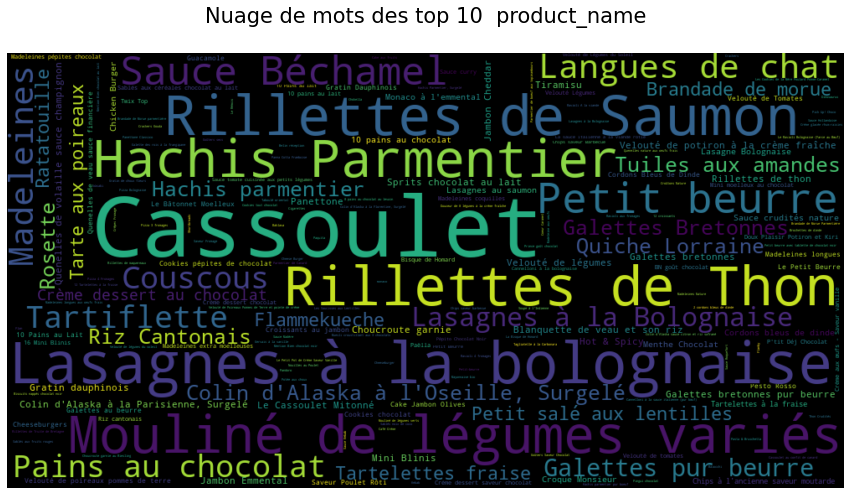

In [87]:
#Les 10 produits contenant du lait/lactose et appartenent à ces catégories
trace_word(df=f1,column="product_name",nb_top=10)

Création des etiquettes pour les produits. 

In [88]:
food_data['is_lactose'] = np.where ( ((food_data['lactose_100g'].isnull()) & ((food_data['pnns_groups_2']=='inconnue') | food_data['pnns_groups_2'].isin(liste))), "inconnu", "connu")

In [89]:
food_data[food_data['is_lactose']=='inconnu']

,code,product_name,brands,ingredients_text,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,last_modified_datetime,origins,countries,...,proteins_100g,carbohydrates_100g,sugars_100g,lactose_100g,fat_100g,saturated-fat_100g,fiber_100g,magnesium_100g,fruits-vegetables-nuts_100g,is_lactose
242,10,Madeleines nature,Bijou,"Farine de _blé_, huile de colza, sucre, _oeufs...",Sugary snacks,Biscuits and cakes,d,2016-10-20 00:00:00,inconnue,France,...,6.00,55.0,26.00,NaN,23.0,2.50,1.50,NaN,NaN,inconnu
279,30,Cakes Raisins,Bijou,"Farine de _blé_, _œufs_ frais, huile de colza,...",Sugary snacks,Biscuits and cakes,d,2016-12-15 00:00:00,inconnue,France,...,5.80,56.0,28.00,NaN,19.0,2.50,1.80,NaN,NaN,inconnu
283,31,Cakes aux Fruits,Bijou,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",Sugary snacks,Biscuits and cakes,d,2016-08-18 00:00:00,inconnue,France,...,4.90,60.0,34.00,NaN,15.0,2.00,1.50,NaN,37.4,inconnu
299,50,Financiers aux Amandes,Bijou,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",Sugary snacks,Biscuits and cakes,e,2016-11-30 00:00:00,inconnue,France,...,8.00,51.0,39.00,NaN,23.0,10.00,1.70,NaN,NaN,inconnu
301,51,Fondants Citron,Bijou,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",Sugary snacks,Biscuits and cakes,e,2016-12-01 00:00:00,inconnue,France,...,8.10,50.0,37.00,NaN,24.0,10.00,2.50,NaN,NaN,inconnu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320652,9556587103869,Mini Paratha,Kawan,"Farine de _blé_ (52%), eau, huile de palme, su...",Cereals and potatoes,Bread,c,2017-02-06 00:00:00,inconnue,France,...,6.00,41.4,5.10,NaN,15.0,9.00,6.50,NaN,NaN,inconnu
320668,9577283844672,100% Pur Jus 4 agrumes,Cora,"Jus d'orange (dont pulpe 1,6%), jus de clément...",Beverages,Fruit juices,c,2017-02-16 00:00:00,inconnue,France,...,0.60,10.2,9.20,NaN,0.5,0.00,0.60,NaN,100.0,inconnu
320670,9588400178181,Cacao,Banania,inconnue,inconnue,inconnue,c,2016-04-11 00:00:00,inconnue,France,...,5.70,79.0,68.00,NaN,2.1,1.20,6.40,NaN,NaN,inconnu
320751,9847548283004,Tartines craquantes bio au sarrasin,Le Pain des fleurs,inconnue,Cereals and potatoes,Bread,a,2015-09-14 00:00:00,inconnue,France,...,13.00,74.8,2.60,NaN,2.8,0.60,5.90,0.186,NaN,inconnu


Imputation par la médiane dans un premier temps.

In [90]:
food_data['lactose_100g'] = food_data['lactose_100g'].fillna(food_data.groupby('pnns_groups_2')['lactose_100g'].transform('median') )

On remarque que l'impuation n'est pas faite sur tous les produits. Elle est en effet réalisé que pour les produits appartenant à des catégories dont au moins un produit detient un taux de lactose connu. 

In [91]:
food_data.groupby('pnns_groups_2').describe()['lactose_100g']

,count,mean,std,min,25%,50%,75%,max
pnns_groups_2,,,,,,,,
Appetizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artificially sweetened beverages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biscuits and cakes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bread,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breakfast cereals,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cereals,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cheese,2525.0,0.099960,1.990074e-03,0.00,0.10,0.10,0.10,0.10
Chocolate products,1621.0,0.011678,3.296386e-01,0.00,0.00,0.00,0.00,10.00
Dairy desserts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
food_data[food_data['pnns_groups_2']=='Milk and yogurt']['lactose_100g']

174645    0.1
175318    0.1
175339    0.1
175388    0.1
175389    0.1
         ... 
312106    0.1
312107    0.1
312137    0.1
312403    0.1
318619    0.1
Name: lactose_100g, Length: 1756, dtype: float64

In [93]:
#Imputation par 0.1  ( 0.1 = taux de lactose median de la pluplart des catégories)
food_data['lactose_100g'].fillna(0.1, inplace=True)

Imputation des deux autres variables 

- Magnesium_100g

Là aussi je procède de la même manière que j'ai procédé avec l'impuation de la variable lactose.

In [94]:
f=food_data.groupby('pnns_groups_2').describe()['magnesium_100g'].reset_index()
display("catégorie de produits ne contenant pas de magnesium", f[f['mean'].isnull()]['pnns_groups_2'].to_list() )
display(f)
liste=f[f['mean'].isnull()]['pnns_groups_2'].to_list()

'catégorie de produits ne contenant pas de magnesium'

['Cheese',
 'Dressings and sauces',
 'Eggs',
 'Fats',
 'Fruit nectars',
 'Ice cream',
 'Meat',
 'Pizza pies and quiche',
 'Potatoes',
 'Processed meat',
 'Salty and fatty products',
 'Sandwich',
 'Soups',
 'fruits',
 'pastries',
 'vegetables']

,pnns_groups_2,count,mean,std,min,25%,50%,75%,max
0,Appetizers,4.0,0.263900,0.027984,2.346000e-01,0.246150,0.26100,0.278750,0.2990
1,Artificially sweetened beverages,3.0,0.018333,0.007217,1.000000e-02,0.016250,0.02250,0.022500,0.0225
2,Biscuits and cakes,79.0,0.122215,0.066564,4.500000e-02,0.075950,0.11200,0.152000,0.5600
3,Bread,20.0,0.124815,0.051356,5.900000e-02,0.075725,0.12000,0.177750,0.2000
4,Breakfast cereals,30.0,0.113383,0.044195,5.500000e-02,0.091800,0.10850,0.124750,0.2740
5,Cereals,76.0,0.138679,0.084567,4.900000e-02,0.078400,0.11350,0.160250,0.3570
6,Cheese,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Chocolate products,61.0,0.170298,0.103750,3.900000e-02,0.113000,0.15600,0.183000,0.6050
8,Dairy desserts,7.0,0.075000,0.080501,3.000000e-02,0.030000,0.03000,0.088000,0.2290
9,Dressings and sauces,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
food_data['is_lactose'] = np.where ( ((food_data['magnesium_100g'].isnull()) & ((food_data['pnns_groups_2']=='inconnue') | food_data['pnns_groups_2'].isin(liste))), "inconnu", "connu")
food_data.groupby('pnns_groups_2').describe()['magnesium_100g']

,count,mean,std,min,25%,50%,75%,max
pnns_groups_2,,,,,,,,
Appetizers,4.0,0.263900,0.027984,2.346000e-01,0.246150,0.26100,0.278750,0.2990
Artificially sweetened beverages,3.0,0.018333,0.007217,1.000000e-02,0.016250,0.02250,0.022500,0.0225
Biscuits and cakes,79.0,0.122215,0.066564,4.500000e-02,0.075950,0.11200,0.152000,0.5600
Bread,20.0,0.124815,0.051356,5.900000e-02,0.075725,0.12000,0.177750,0.2000
Breakfast cereals,30.0,0.113383,0.044195,5.500000e-02,0.091800,0.10850,0.124750,0.2740
Cereals,76.0,0.138679,0.084567,4.900000e-02,0.078400,0.11350,0.160250,0.3570
Cheese,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chocolate products,61.0,0.170298,0.103750,3.900000e-02,0.113000,0.15600,0.183000,0.6050
Dairy desserts,7.0,0.075000,0.080501,3.000000e-02,0.030000,0.03000,0.088000,0.2290


In [96]:
#Imputation par la médiane 
food_data['magnesium_100g'] = food_data['magnesium_100g'].fillna(food_data.groupby('pnns_groups_2')['magnesium_100g'].transform('median') )
#Imputation par mediane la plus fréquente au sein des catégories
food_data['magnesium_100g'].fillna(0.1, inplace=True)

- fruits-vegetables-nuts_100g

In [97]:
f=food_data.groupby('pnns_groups_2').describe()['fruits-vegetables-nuts_100g'].reset_index()
display("catégorie de produits ne contenant pas de fruits-vegetables-nuts_100g", f[f['mean'].isnull()]['pnns_groups_2'].to_list() )
display(f)
liste=f[f['mean'].isnull()]['pnns_groups_2'].to_list()

'catégorie de produits ne contenant pas de fruits-vegetables-nuts_100g'

['Potatoes', 'Salty and fatty products']

,pnns_groups_2,count,mean,std,min,25%,50%,75%,max
0,Appetizers,6.0,18.833333,29.485024,0.0,0.000,5.50,23.000,75.0
1,Artificially sweetened beverages,6.0,17.500000,15.971850,9.0,10.500,12.00,12.000,50.0
2,Biscuits and cakes,60.0,18.780000,16.618142,0.0,0.000,21.00,34.525,47.0
3,Bread,7.0,0.714286,1.889822,0.0,0.000,0.00,0.000,5.0
4,Breakfast cereals,21.0,9.290476,11.930084,0.0,0.000,3.50,16.500,38.1
5,Cereals,23.0,9.317391,23.337634,0.0,0.000,0.00,5.000,100.0
6,Cheese,20.0,1.910000,3.223744,0.0,0.000,0.00,3.000,12.0
7,Chocolate products,19.0,13.368421,24.051358,0.0,0.000,0.00,25.000,100.0
8,Dairy desserts,15.0,4.793333,4.332183,0.0,1.000,4.00,8.250,13.3
9,Dressings and sauces,28.0,21.285714,33.353169,0.0,0.000,0.00,41.750,94.0


In [98]:
#Imputation par la médiane 
food_data['fruits-vegetables-nuts_100g'] = food_data['fruits-vegetables-nuts_100g'].fillna(food_data.groupby('pnns_groups_2')['fruits-vegetables-nuts_100g'].transform('median') )
#Imputation par 0
food_data['fruits-vegetables-nuts_100g'].fillna(80, inplace=True)

In [99]:
food_data.groupby('pnns_groups_2').describe()['fruits-vegetables-nuts_100g']

,count,mean,std,min,25%,50%,75%,max
pnns_groups_2,,,,,,,,
Appetizers,1364.0,5.558651,1.992062,0.0,5.50,5.50,5.50,75.0
Artificially sweetened beverages,177.0,12.186441,2.871141,9.0,12.00,12.00,12.00,50.0
Biscuits and cakes,3097.0,20.956991,2.314401,0.0,21.00,21.00,21.00,47.0
Bread,1047.0,0.004776,0.154524,0.0,0.00,0.00,0.00,5.0
Breakfast cereals,902.0,3.634812,1.980557,0.0,3.50,3.50,3.50,38.1
Cereals,2573.0,0.083288,2.329827,0.0,0.00,0.00,0.00,100.0
Cheese,2525.0,0.015129,0.326972,0.0,0.00,0.00,0.00,12.0
Chocolate products,1621.0,0.156693,2.915285,0.0,0.00,0.00,0.00,100.0
Dairy desserts,661.0,4.018003,0.641938,0.0,4.00,4.00,4.00,13.3


##### Export du dataframe nettoyés

In [100]:
from google.colab import drive
drive.mount('/content/drive')

filepath ='/content/drive/MyDrive/food_openfood.csv'

#food_data.to_csv(filepath,encoding= 'utf-8')  

Mounted at /content/drive


In [101]:
food_data.set_index("code").to_csv(filepath, sep='\t', encoding ="utf-8")

### ANALYSES ANNEXES

Imputation des varaiables "fruits-vegetables-nuts_100g" et "lactose_100g"